<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/mechanics/answers-to-selected-assignments/Examples_of_Describing_Motion_in_Moving_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examples of Description of Motion in Moving Frames

* This solution was worked out by Chathuska Chamith (chathushkachamith11@gmail.com)


In [ ]:
import math as m
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols

#
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=True)

In [ ]:
class mugas_dynamic_systems_simulation_functions:

  def __init__(self):
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))

    fig.show()
    return [t,sol,fig]

  def Q3simu(X_0, Parem, dT, tsampl):
    X_n = X_0
    X_n = np.array(X_n)
    X_n = np.t
    #for i in range(tsampl):


  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

# Q1 - Consider the bead in a slotted disk as shown below and answer the questions that follow.

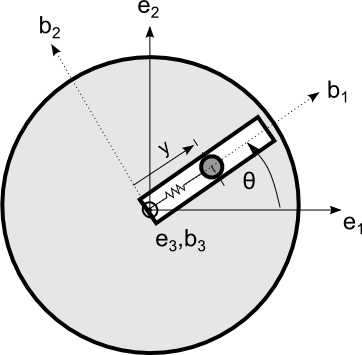

Consider the ball of mass $m$ constrained to move as shown in the figure above. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk and the orthonormal frame $\mathbf{b}$ is fixed to the disk with origin at the centre of the disk.  The disk is rotating about the $\mathbf{e}_3$ axis. Gravity acts in the negative $\mathbf{e}_3$ direction and the disk and the mass lies on a smooth horizontal surface. The un-stretched length of the spring is $y_0$.

The position of the ball can be represented as $x$ in the $\mathbf{e}$ frame and as $X$ in the $\mathbf{b}$ frame. The forces acting on the ball can be represented as $f$ in the $\mathbf{e}$ frame and as $F$ in the $\mathbf{b}$ frame. Answer the following with detailed justification:

* Write down $x$ and $X$.

* Write down $f$ and $F$.

* Show that the two frames $\mathbf{b}$ and $\mathbf{e}$ are related by $\mathbf{b}=\mathbf{e}\,R$ where $R\in SO(3)$ and is explicitly given by

\begin{align}
R=\begin{bmatrix} \cos{\theta} & -\sin{\theta} & 0\\ \sin{\theta} & \cos{\theta} & 0\\ 0 & 0 & 1
\end{bmatrix}
\end{align}

* Show that
\begin{align}
\widehat{\Omega}=\begin{bmatrix} 0 & -\dot{\theta} & 0\\ \dot{\theta} & 0 & 0\\ 0 & 0 & 0
\end{bmatrix}
\end{align}

* Show that
\begin{align}
\widehat{\Omega}^2=-\dot{\theta}^2\begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 0
\end{bmatrix}
\end{align}

* Show that

\begin{align}
\ddot{x}=R\left(\widehat{\Omega}^2X+2\widehat{\Omega}X+\dot{\widehat{\Omega}}X+\ddot{X}\right)
\end{align}

* Show that Newton's equations for the ball is given by
\begin{align}
m\left(\widehat{\Omega}^2X+2\widehat{\Omega}X+\dot{\widehat{\Omega}}X+\ddot{X}\right)=F.
\end{align}

* Thus show that
\begin{align}
\begin{bmatrix}
m(\ddot{y}-y\dot{\theta}^2) \\ m(2\dot{y}\dot{\theta}+y\ddot{\theta})\\ 0
\end{bmatrix}=
\begin{bmatrix}
-k(y-y_0) \\ N_2\\ N_3-mg
\end{bmatrix}.
\end{align}

* Simulate the motion for different initial conditions.


In [ ]:
# Defining X, F, R
theta, y = dynamicsymbols('theta y')
k, y0, N2, N3, m, g, t = symbols('k y_0 N_2 N_3 m g t', real=True)

X = Matrix([y, 0, 0])

F = Matrix([-k*(y-y0), N2, N3-m*g])

R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])

Newton's equations in the moving frame $\mathbf{b}$ is
\begin{align}
m\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)=F
\end{align}

Finding $\widehat{\Omega}$
\begin{align}
\widehat{\Omega}=R^T\dot{R}
\end{align}

In [ ]:
dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHat

In [ ]:
latex(OmegaHat)

Finding $\widehat{\Omega}^2$

In [ ]:
OmegaHatSquare = simplify(OmegaHat ** 2)
OmegaHatSquare

Finding $\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)$

In [ ]:
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Derivative(X)
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)
#Find
RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX

In [ ]:
RHS

In [ ]:
F

Hence equations of motion for the bead are
\begin{align}
\begin{bmatrix}
m(\ddot{y}-y\dot{\theta}^2) \\ m(2\dot{y}\dot{\theta}+y\ddot{\theta})\\ 0
\end{bmatrix}=
\begin{bmatrix}
-k(y-y_0) \\ N_2\\ N_3-mg
\end{bmatrix}.
\end{align}

Consider $\ddot{y}=-(k/m)(y-y_0)+y\dot{\theta}^2$

Let $X_1=y$ and $X_2=\dot{y}$

Then, $\dot{X_1}=X_2$

and $\dot{X_2}=-(k/m)(X_1-y_0)+X_1\dot{\theta}^2$

If $X=\begin{bmatrix}
X_1 \\ X_2
\end{bmatrix}$

Then
\begin{align}
\dot{X}=f(X)
\end{align}

Where
\begin{align}
f(X)=\begin{bmatrix}
X_2 \\ -(k/m)(X_1-y_0)+X_1\dot{\theta}^2
\end{bmatrix}
\end{align}

Augmenting the state with $\theta$ we have
\begin{align}
X=\begin{bmatrix}
X_1 \\ X_2 \\ X_3
\end{bmatrix}
\end{align}

where $X_3=\theta$

Then
\begin{align}
\dot{X}=f(X)
\end{align}

Where
\begin{align}
f(X)=\begin{bmatrix}
X_2 \\ -(k/m)(X_1-y_0)+X_1\dot{\theta}^2 \\ \dot{\theta}
\end{bmatrix}
\end{align}

In [ ]:
def bead_in_slotted_disk (X,t, parameters):
  g=9.806;
  m=1;
  k=5;
  y0 = parameters[1];
  dtheta=parameters[0];
  y=X[0];
  dy=X[1];
  ddy=y*dtheta**2-(k/m)*(y-y0);
  return [dy, ddy, dtheta]

In [ ]:
def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))

    fig.show()
    return [t,sol,fig]

In [ ]:
Natural_Length=0.8;
omega=0.5;
y=1
dy=0
theta_init=0
[t,sol,fig]=simulateDySystem(bead_in_slotted_disk, 25,0.05, [1,0,theta_init], [omega, Natural_Length], 'Bead_in_slotted_disk', 'Time / t', '$y,\dot{y},\\theta$')

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  theta = sol[i][2]
  # write as x=RX as well
  XX[i,:]=[y*np.cos(theta),y*np.sin(theta),0];

In [ ]:
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion Observed in the e-frame')

# Q2 - Consider a ball of mass $m$ constrained to move as shown in the figure below. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{b}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis). Write down the equations of motion of the mass and simulate the system for various different initial conditions.

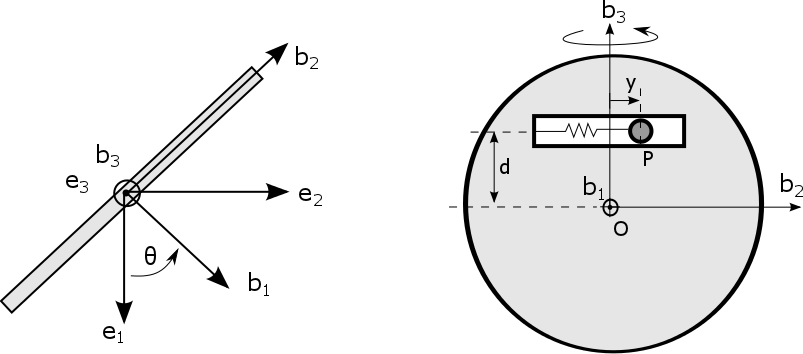

In [ ]:
# Defining X, F, R
theta, y = dynamicsymbols('theta y')
k, d, N1, N3, m, g, t = symbols('k d N_1 N_3 m g t', real=True)

X = Matrix([0, y, d])

F = Matrix([N1,-k*y, N3-m*g])

R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)

dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0,Derivative(y),0])
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)
#Find
RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX


In [ ]:
RHS

In [ ]:
F

Equations of motion are
$m\ddot{y}=my\dot{\theta}^2-ky$

In [ ]:
def bead_in_slotted_disk_2(X, t, sysParameters):
  X1=X[0]; X2=X[1]; X3 = X[2];
  m=sysParameters[0]; k=sysParameters[1];
  thetaDot=sysParameters[2];
  dXdt=[X2, thetaDot**2*X1-k*X1/m, thetaDot];
  return dXdt

In [ ]:
m=1; k=4; y0=0.4; dtheta=0.2; thetai = 0;
[t,sol,fig]=md.simulateDySystem(bead_in_slotted_disk_2, 32,0.2, [1.5,0,thetai], [m,k,dtheta], '$y(t) \hspace{3mm}and\hspace{3mm} \dot{y}(t)\hspace{3mm} vs\hspace{3mm} t$', 'Time / t', '$y, \dot{y}, \\theta$')

In [ ]:
d = 2

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  theta = sol[i][2]
  XX[i,:]=[-y*np.sin(theta),y*np.cos(theta),d];

In [ ]:
fig=md.animate_particle_motion(XX,[[-3,3],[-3,3],[-3,3]],'Motion Observed in the e-frame')

# Q3 - Consider a ball of mass $m$ constrained to move as shown in figure. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). Write down the equations of motion of the mass and simulate its motion for various different initial conditions.

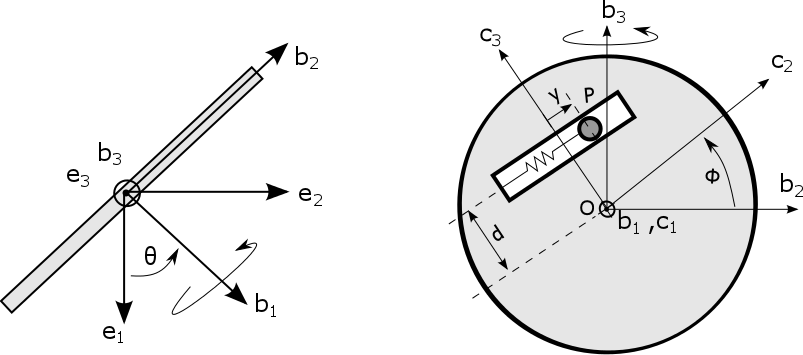

In [ ]:
theta, phi, y = dynamicsymbols('theta phi y')
k, d, y0, N1, N3, m, g, t = symbols('k d y_0 N_2 N_3 m g t', real=True)

In [ ]:
R3 = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
R1 = Matrix([[1, 0, 0], [0, cos(phi), -sin(phi)], [0, sin(phi), cos(phi)]])

R = R3 @ R1

X = Matrix([0, y, d])

F = Matrix([N1, -k*(y-y0), N3])-m*g*R1.T @ Matrix([0, 0, 1])
dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)

In [ ]:
R3

In [ ]:
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0,Derivative(y),0])
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)

RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX
RHS

In [ ]:
F

Angular Momentum of the mass is given by
\begin{align*}
\pi_p&=R\left(-m_p\widehat{X}_p^2\Omega+m_pX_p\times \dot{X}_p\right),
\end{align*}

In [ ]:
Omega=Matrix([[-OmegaHat[1,2]],[OmegaHat[0,2]],[-OmegaHat[0,1]]])

In [ ]:
Xhat=Matrix([[0, -X[2], X[1]],[X[2],0,-X[0]],[-X[1], X[0], 0]])

In [ ]:
Pi=m*(-Xhat**2@Omega+Xhat@dX)

In [ ]:
{m}**2*(-{d}*{dy} + ({d}**2 + {y}**2)*{dphi})**2 + {m}**2*({d}**2*sin({phi})*{dtheta} - {d}*{y}*cos({phi})*{dtheta})**2 + {m}**2*(-{d}*{y}*sin({phi})*{dtheta} + {y}**2*cos({phi})*{dtheta})**2

In [ ]:
def bead_in_slotted_disk_3 (X,t, parameters):
  g=9.806;
  m=1;
  k=5;
  y0 = parameters[0];
  d = parameters[1]
  dtheta=parameters[2];
  dphi = parameters[3];

  y=X[0];
  dy=X[1];
  phi =X[3]
  ddy=y*dphi**2-(k/m)*(y-y0)+y*cos(phi)*cos(phi)*dtheta**2+(d/2)*sin(2*phi)*dtheta**2+m*g*sin(phi);
  return [dy, ddy, dtheta, dphi]

def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))

    fig.show()
    return [t,sol,fig]

Rotating with the initial conditions of $\dot{\theta}=0.5$ and $\dot{\phi}=0.4$

In [ ]:
Length=0.8;
dtheta=0.5;
dphi=0.4
theta = 0;
phi = 0
d = 1
[t,sol,fig]=simulateDySystem(bead_in_slotted_disk_3, 25,0.1, [1,0,theta, phi], [Length, d, dtheta, dphi], 'bead_in_slotted_disk_3', 'Time / t', '$y,\dot{y},\\theta,\\phi$')

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  phi = sol[i][3]
  theta = sol[i][2]
  XX[i,:]=[-y*np.sin(theta)*np.cos(phi),y*np.cos(phi)*np.cos(theta),y*np.sin(phi)];

fig=md.animate_particle_motion(XX,[[-3,3],[-3,3],[-1,5]],'Motion Observed in the e-frame')

# Q4 -  Consider the rotating spring pendulum shown in figure below (Figure copied from G. T. Greenwood).  The mass of the point $P$ is $m$. The un-stretched length of the spring is $L_0$. Neglecting friction and the moment of inertia of the spring derive the equations of motion of the system if the arm is rotating at a constant angular velocity of $\Omega$. Derive the equations of motion for the particle and simulate its motion for various different initial conditions.




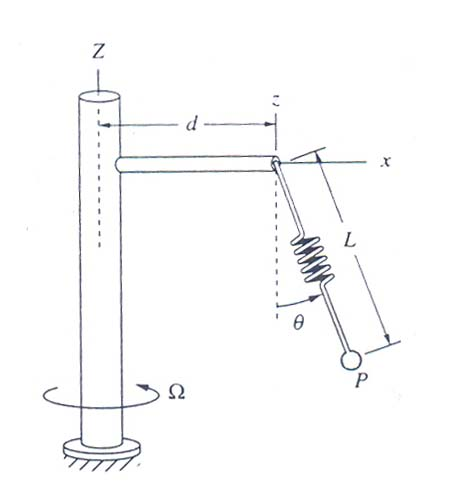

In [ ]:
theta, phi, y = dynamicsymbols('theta phi y')
k, d, y0, m, g, N1, N2, t = symbols('k d y_0 m g N_1 N_2 t')

In [ ]:
R3 = Matrix([[cos(phi), -sin(phi), 0], [sin(phi), cos(phi), 0], [0, 0, 1]])
# R1 = Matrix([[1, 0, 0], [0, cos(phi - (pi/2)), -sin(phi - (pi/2))], [0, sin(phi - (pi/2)), cos(phi - (pi/2))]])
R1 = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])


R = R3 @ R1
X = Matrix([d, 0, -y])

F = Matrix([N1, -m*g*sin(theta), k*(y-y0)-m*g*cos(theta)])

dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0, 0, -Derivative(y)])
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)

RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX
RHS

In [ ]:
F

In [ ]:
def bead_in_spring (X,t, parameters):
  g=9.806;
  m=1;
  k=8;
  y0 = parameters[0];
  d = parameters[1]
  dphi=parameters[2];

  y=X[0];
  theta=X[1]
  phi = X[2]
  dy=X[3];
  dtheta =X[4]
  ddy=y*dtheta**2-(k/m)*(y-y0)+y*sin(theta)*sin(theta)*dphi**2+g*cos(theta)+d*sin(theta)*dphi**2;
  ddtheta = -2*dtheta*(dy/y)+d*cos(theta)*(dphi**2)/y-g*sin(theta)/y+(sin(2*theta)/2)*dphi**2
  # ddphi = (sin(2*phi)*dtheta**2)/2-2*dphi*(dy/y)+g*sin(theta)/y
  return [dy, dtheta, dphi, ddy, ddtheta]

def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))

    fig.show()
    return [t,sol,fig]

In [ ]:
Length=0.6;
dtheta=0;
dphi = 0.5
theta = np.pi/3;
phi = 0
d = 10
y = 1
dy= 0
[t,sol,fig]=simulateDySystem(bead_in_spring, 15,0.01, [y, theta, phi, dy, dtheta], [Length, d, dphi], 'bead_in_spring', 'Time / t', '$y,\\theta,\\phi,\dot{y},\dot{\\theta}$')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  phi = sol[i][2]
  theta = sol[i][1]
  XX[i,:]=[-d*np.sin(phi)-y*np.sin(theta)*np.sin(phi),d*np.cos(phi)+y*np.sin(theta)*np.cos(phi),-y*np.cos(theta)];

fig=md.animate_particle_motion(XX,[[-15,15],[-15,15],[-15,15]],'Motion Observed in the e-frame')

# Q5 -  Consider the particle that is constrained to move in a rotating hoop as shown in the figure below.  The mass of the bead is $m$ and the radius of the hoop is $r$. Neglecting friction derive the equations of motion of the bead if the bead is rotating at a constant angular velocity of $\omega$. Simulate its motion for various different initial conditions.




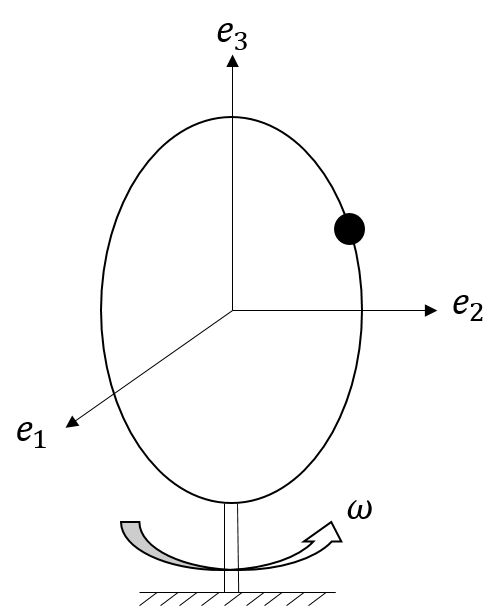

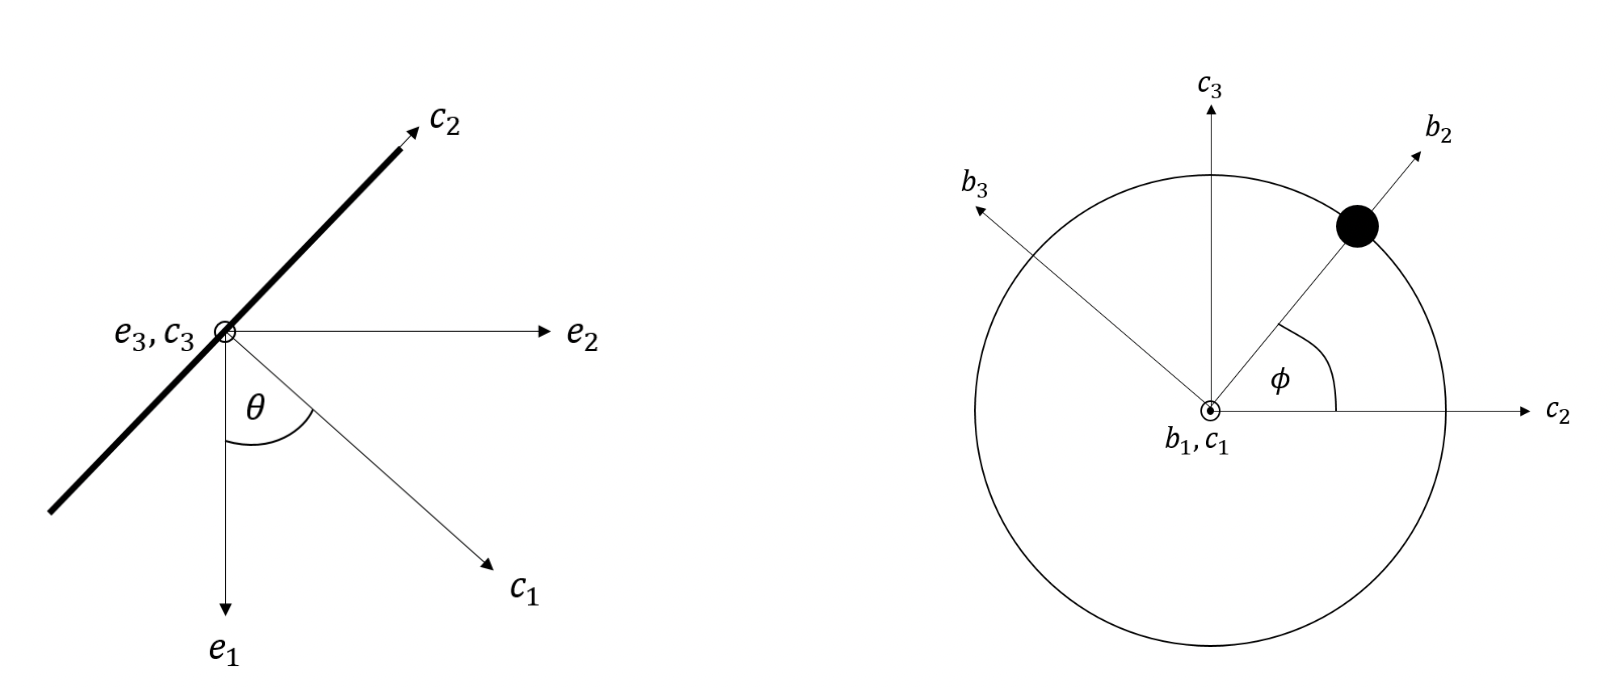

In [ ]:
theta, phi= dynamicsymbols('theta phi')
r, m, g, k, N1, N2, t = symbols('r m g k N_1 N_2 t', real=True)

In [ ]:
R3 = Matrix([[cos(phi), -sin(phi), 0], [sin(phi), cos(phi), 0], [0, 0, 1]])
# R1 = Matrix([[1, 0, 0], [0, cos(phi - (pi/2)), -sin(phi - (pi/2))], [0, sin(phi - (pi/2)), cos(phi - (pi/2))]])
R1 = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])


R = R3 @ R1
X = Matrix([0, r, 0])


F = Matrix([N1, N2,0]) - m*g*R1.T@Matrix([0,0,1])

dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0, 0, 0])
ddX = Matrix([0, 0, 0])

RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX
RHS

In [ ]:
XHat=Matrix([[0, -X[2], X[1]],[X[2], 0, -X[0]],[-X[1], X[0],0]])
IIp=-m*XHat**2

In [ ]:
IIp

In [ ]:
Omega=Matrix([-OmegaHat[1,2],OmegaHat[0,2],-OmegaHat[0,1]])
pip=IIp@Omega

In [ ]:
pip

In [ ]:
def bead_in_ring (X,t, parameters):
  g=9.806;
  m=1;
  r = parameters[0]
  dphi=parameters[1];

  theta=X[0];
  dtheta=X[1]
  ddtheta = -g*cos(theta)/r - (sin(2*theta)*dphi**2)/2
  return [dtheta, ddtheta, dphi]

def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))

    fig.show()
    return [t,sol,fig]

In [ ]:
dtheta=0;
theta = np.pi/3
phi=0
dphi = 0.6
r = 1

[t,sol,fig]=simulateDySystem(bead_in_ring, 5,0.01, [theta, dtheta, phi], [r, dphi], 'bead_in_ring', 'Time / t', '$\\theta,\dot{\\theta},\\phi$')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  phi = sol[i][2]
  theta=sol[i][0]
  XX[i,:]=[-r*np.sin(phi)*np.cos(theta),r*np.cos(phi)*np.cos(theta),r*np.sin(theta)];

fig=md.animate_particle_motion(XX,[[-1.2,1.2],[-1.2,1.2],[-1.2,1.2]],'Motion Observed in the e-frame')

# Q6 - Consider three orthonormal frames $\mathbf{e}$, $\mathbf{c}$ and $\mathbf{b}$ with coinciding origins. At any given time instant $t$ the frame $\mathbf{c}$ is related to the frame $\mathbf{e}$ by a counter clockwise rotation about the third axis by an angle $\phi=\alpha\, t$ and the frame $\mathbf{b}$ is related to the frame $\mathbf{c}$ by a counter clockwise rotation about the first axis by an angle $\theta=\beta \, t$ where $\alpha$ and $\beta$ are constant. Let $\mathbf{b}=\mathbf{e}R(t)$ where $R(t)\in SO(3)$. A particle $P$ of mass $m$ is moving in space in such a way that it oscillates about the origin of the frames along the $\mathbf{b}_2$ axis at a frequency of $\omega$ rad/s with an amplitude of $r$ m. That is if $y$ is the displacement of $P$ along the $\mathbf{b}_2$ axis then $y(t)=r\cos(\omega t)$. Find the force acting on the particle in the $\mathbf{b}$ frame and the angular momentum in the $\mathbf{e}$ frame.

$\mathbf{c}=\mathbf{e}R_3(\phi)$ and $\mathbf{b}=\mathbf{c}R_1(\theta)$.

Hence
\begin{align}
\mathbf{b}=\mathbf{c}R_1(\theta)=\mathbf{e}R_3(\phi)R_1(\theta)
\end{align}

The angular velocity of the frame $\mathbf{b}$ with respect to $\mathbf{e}$ is the $\mathbb{R}^3$ version of $\widehat{\Omega}=R^T\dot{R}$.

\begin{align}
\widehat{\Omega}&=R_1^TR_3^T(\dot{R}_3R_1+R_3\dot{R}_1)\\
=&R_1^T(R_3^T\dot{R}_3R_1+\dot{R}_1)\\
=&R_1(R_3^T\dot{R}_3)R_1+R_1^T\dot{R}_1\\
\end{align}
which gives
\begin{align}
\Omega=&\dot{\phi}\:R_1^T{e}_3+\dot{\theta}\:{e}_1
\end{align}
where
$e_1=[1,0,0]^T$ and $e_3=[0,0,1]^T$.

Simplifying we get
\begin{align}
\Omega&=\dot{\phi}\:\begin{bmatrix}0\\\sin{\theta}\\\cos{\theta}\end{bmatrix}+\dot{\theta}\:\begin{bmatrix}1\\0\\0\end{bmatrix}=\:\begin{bmatrix}\dot{\theta}\\\dot{\phi}\sin{\theta}\\\dot{\phi}\cos{\theta}\end{bmatrix}.
\end{align}

The motion variables of the particles in the $\mathbf{e}$:

\begin{align}
x&=RX\\
\dot{x}&=R\left(\widehat{\Omega}X+\dot{X}\right)\\
\ddot{x}&=R\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\widehat{\dot{\Omega}}X+\ddot{X}\right)
\end{align}

The angular momentum of the particle about the origin of the frames:
\begin{align}
\pi&=x\times m\dot{x}\\
&=mR\left(X\times\left(\widehat{\Omega}X+\dot{X}\right)\right)\\
&=R\left(-m\widehat{X}^2\Omega+mX\times\dot{X}\right)\\
&=R\left(\mathbb{I}_p\Omega+mX\times\dot{X}\right)
\end{align}
where $\mathbb{I}_p\triangleq-m\widehat{X}^2$

The rate of change of angular mometum is:
\begin{align}
\dot{\pi}&=x\times f\\
&=R(X\times F)
\end{align}
where $f$ is the representation of the forces acting on the particle in the $\mathbf{e}$ frame and $F$ is the representation of the forces acting on the particle in the $\mathbf{b}$ frame.

Simplifying we get

If $F$ is the forces acting on the particle and represented in the $\mathbf{b}$ frame we have from Newtons equations (assuming that the $\mathbf{b}$ frame is an inertial frame):
\begin{align}
m\ddot{x}&=RF
\end{align}
which gives
\begin{align}
m\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\widehat{\dot{\Omega}}X+\ddot{X}\right)&=F
\end{align}

##Symbolic Computations

In [ ]:
init_vprinting()
m, r, t, alpha, beta, omega=symbols('m, r, t, alpha, beta, omega')
y, phi, theta=dynamicsymbols('y, phi, theta',real=True)

In [ ]:
X=Matrix([0,y,0])

In [ ]:
R1_theta=Matrix([[1,0,0],[0,cos(theta),-sin(theta)],[0,sin(theta),cos(theta)]])
R3_phi=Matrix([[cos(phi),-sin(phi),0],[sin(phi),cos(phi),0],[0,0,1]])
R=R3_phi @ R1_theta

In [ ]:
hatOmega=simplify(R.T*R.diff(t))

In [ ]:
hatOmega

In [ ]:
hatOmegadot=hatOmega.diff(t)

In [ ]:
hatOmegadot

In [ ]:
Omega=Matrix([-hatOmega[1,2],hatOmega[0,2],-hatOmega[0,1]])

In [ ]:
Omega

In [ ]:
Xdot=X.diff(t)
Xddot=X.diff(t,2)

In [ ]:
F=m*(hatOmega**2*X+2*hatOmega*Xdot+hatOmegadot*X+Xddot)

In [ ]:
F

In [ ]:
hatX=Matrix([[0,0,y],[0,0,0],[-y,0,0]])
Ip=-m*hatX**2

In [ ]:
pi=R*(Ip * Omega + m*hatX * Xdot)

In [ ]:
pi

In [ ]:
y_expr = r * cos(omega * t)
phi_expr = alpha * t
theta_expr = beta * t

y_dot_expr = y_expr.diff(t)
y_ddot_expr = y_dot_expr.diff(t)

phi_dot_expr = phi_expr.diff(t)
phi_ddot_expr = phi_dot_expr.diff(t)
theta_dot_expr = theta_expr.diff(t)
theta_ddot_expr = theta_dot_expr.diff(t)

F_subs = F.subs({
    y: y_expr,
    y.diff(t): y_dot_expr,
    y.diff(t, 2): y_ddot_expr,
    phi: phi_expr,
    phi.diff(t): phi_dot_expr,
    phi.diff(t,2): phi_ddot_expr,
    theta: theta_expr,
    theta.diff(t): theta_dot_expr,
    theta.diff(t,2): theta_ddot_expr
})

F_simplified = simplify(F_subs)

# Display the simplified force expression
F_simplified

In [ ]:
pi_subs= pi.subs({
    y: y_expr,
    y.diff(t): y_dot_expr,
    y.diff(t, 2): y_ddot_expr,
    phi: phi_expr,
    phi.diff(t): phi_dot_expr,
    phi.diff(t,2): phi_ddot_expr,
    theta: theta_expr,
    theta.diff(t): theta_dot_expr,
    theta.diff(t,2): theta_ddot_expr
})
pi_simplified = simplify(pi_subs)
pi_simplified